In [1]:
from google.colab import drive
drive.mount('/content/drive')
# %cd /content/drive/MyDrive/ECE324/ECE324 Project 
%cd /content/drive/MyDrive/ECE324 Project

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1n2vGsCOPhE_6QOOxyZh4O8W37BWTgMRY/ECE324 Project


In [96]:
import json
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [97]:
# df = pd.read_csv("cleanedData.csv", sep='\t')
df = pd.read_csv("cleanedData_cuisinevec.csv", sep=',')
# df = df.rename(index={0: "stars", 1: "delivery", 2: "takeout", 3: "outdoor seating", 4: "closingTime", 5: "cost", 6: "cuisine", 7: "location"})
df = df.replace(np.nan,0)
df

,stars,delivery,takeout,Outdoor seating,hours,cost,location,cuisine1,cuisine2,cuisine3,...,cuisine41,cuisine42,cuisine43,cuisine44,cuisine45,cuisine46,cuisine47,cuisine48,cuisine49,cuisine50
0,4.0,1,1,1,15.0,2,0,0.461130,1.158050,-1.254000,...,0.373500,0.391910,-1.187350,0.462550,0.173133,0.889410,-0.447190,-0.074539,0.020047,0.872685
1,4.5,1,1,1,22.0,2,0,-0.239570,-1.112700,-0.451410,...,-0.614770,0.651480,0.374190,-0.389130,1.165600,-0.143990,-0.947270,0.185640,1.439500,-1.022900
2,4.5,1,1,0,21.0,2,0,-0.560245,0.416880,-0.129945,...,0.014230,0.155507,0.605303,-0.594330,-0.091074,0.521544,-0.575590,0.147694,-0.081906,0.242015
3,4.5,0,0,0,16.0,2,0,-0.085708,-0.044853,-0.929813,...,0.207813,0.555055,-0.048445,-0.052447,0.703163,0.650447,-0.613009,0.111827,0.255091,-0.653027
4,4.0,0,0,1,14.5,2,0,0.360702,0.393248,-1.283488,...,0.288502,0.437224,-0.188186,0.331956,0.499129,0.451081,-0.378374,-0.354534,0.220454,0.140336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,3.5,1,1,1,22.0,2,2,0.156797,-0.716633,-0.494297,...,0.126953,0.564053,0.054940,0.352709,0.847907,0.835447,-0.113245,-0.099306,0.126680,0.651583
1026,4.0,0,0,0,21.5,2,2,-0.502720,-0.862780,-0.627790,...,-0.906370,0.861670,0.009006,-0.089209,0.154290,0.450530,-0.464430,0.270310,0.100940,-1.380900
1027,3.0,0,0,0,23.0,2,2,-0.517420,0.405430,-0.351090,...,-0.766800,-0.285950,1.320800,-0.169750,1.765100,-0.466960,-0.716560,0.291030,0.495080,-1.130600
1028,4.0,0,0,0,16.0,1,2,0.442194,-0.481770,-0.675675,...,-0.020160,0.184355,0.689670,-0.249810,1.255900,0.003750,-0.508270,0.085282,0.212090,-0.145425


In [98]:
df0 = df[df['location'] == 0]
df1 = df[df['location'] == 1]
df2 = df[df['location'] == 2]
df3 = df[df['location'] == 3]
df4 = df[df['location'] == 4]
df5 = df[df['location'] == 5]

df= df.drop('location', axis = 1)
df0= df0.drop('location', axis = 1)
df1= df1.drop('location', axis = 1)
df2= df2.drop('location', axis = 1)
df3= df3.drop('location', axis = 1)
df4= df4.drop('location', axis = 1)
df5= df5.drop('location', axis = 1)

In [114]:
# Perform train-test split for all dataframes 
Y_col = 'stars'
X_cols0 = df0.loc[:, df0.columns != Y_col].columns
X_cols1 = df1.loc[:, df1.columns != Y_col].columns
X_cols2 = df2.loc[:, df2.columns != Y_col].columns
X_cols3 = df3.loc[:, df3.columns != Y_col].columns
X_cols4 = df4.loc[:, df4.columns != Y_col].columns
X_cols5 = df5.loc[:, df5.columns != Y_col].columns

X_train0, X_test0, y_train0, y_test0 = train_test_split(df0[X_cols0], df0[Y_col],test_size=0.1, random_state=42)
min = len(X_train0)
X_train1, X_test1, y_train1, y_test1 = train_test_split(df1[X_cols1], df1[Y_col],test_size=0.1, random_state=42)
min = np.minimum(min, len(X_train1))
X_train2, X_test2, y_train2, y_test2 = train_test_split(df2[X_cols2], df2[Y_col],test_size=0.1, random_state=42)
min = np.minimum(min, len(X_train2))
X_train3, X_test3, y_train3, y_test3 = train_test_split(df3[X_cols3], df3[Y_col],test_size=0.1, random_state=42)
min = np.minimum(min, len(X_train3))
X_train4, X_test4, y_train4, y_test4 = train_test_split(df4[X_cols4], df4[Y_col],test_size=0.1, random_state=42)
min = np.minimum(min, len(X_train4))
X_train5, X_test5, y_train5, y_test5 = train_test_split(df5[X_cols5], df5[Y_col],test_size=0.1, random_state=42)
min = np.minimum(min, len(X_train5))

y_train0, y_test0 = np.array(list(y_train0[:min])), np.array(list(y_test0[:min]))
y_train1, y_test1 = np.array(list(y_train1[:min])), np.array(list(y_test1[:min]))
y_train2, y_test2 = np.array(list(y_train2[:min])), np.array(list(y_test2[:min]))
y_train3, y_test3 = np.array(list(y_train3[:min])), np.array(list(y_test3[:min]))
y_train4, y_test4 = np.array(list(y_train4[:min])), np.array(list(y_test4[:min]))
y_train5, y_test5 = np.array(list(y_train5[:min])), np.array(list(y_test5[:min])) 

sc = StandardScaler()
X_train0, X_test0 = sc.fit_transform(X_train0[:min]), sc.transform(X_test0[:min])
X_train1, X_test1 = sc.fit_transform(X_train1[:min]), sc.transform(X_test1[:min])
X_train2, X_test2 = sc.fit_transform(X_train2[:min]), sc.transform(X_test2[:min])
X_train3, X_test3 = sc.fit_transform(X_train3[:min]), sc.transform(X_test3[:min])
X_train4, X_test4 = sc.fit_transform(X_train4[:min]), sc.transform(X_test4[:min])
X_train5, X_test5 = sc.fit_transform(X_train5[:min]), sc.transform(X_test5[:min])

X_train0, X_test0, y_train0, y_test0 = torch.from_numpy(X_train0).to(torch.float32), torch.from_numpy(X_test0).to(torch.float32), torch.from_numpy(y_train0).to(torch.float32), torch.from_numpy(y_test0).to(torch.float32)
X_train1, X_test1, y_train1, y_test1 = torch.from_numpy(X_train1).to(torch.float32), torch.from_numpy(X_test1).to(torch.float32), torch.from_numpy(y_train1).to(torch.float32), torch.from_numpy(y_test1).to(torch.float32)
X_train2, X_test2, y_train2, y_test2 = torch.from_numpy(X_train2).to(torch.float32), torch.from_numpy(X_test2).to(torch.float32), torch.from_numpy(y_train2).to(torch.float32), torch.from_numpy(y_test2).to(torch.float32)
X_train3, X_test3, y_train3, y_test3 = torch.from_numpy(X_train3).to(torch.float32), torch.from_numpy(X_test3).to(torch.float32), torch.from_numpy(y_train3).to(torch.float32), torch.from_numpy(y_test3).to(torch.float32)
X_train4, X_test4, y_train4, y_test4 = torch.from_numpy(X_train4).to(torch.float32), torch.from_numpy(X_test4).to(torch.float32), torch.from_numpy(y_train4).to(torch.float32), torch.from_numpy(y_test4).to(torch.float32)
X_train5, X_test5, y_train5, y_test5 = torch.from_numpy(X_train5).to(torch.float32), torch.from_numpy(X_test5).to(torch.float32), torch.from_numpy(y_train5).to(torch.float32), torch.from_numpy(y_test5).to(torch.float32)

X_train, X_test, y_train, y_test = train_test_split(df, df[Y_col],test_size=0.1, random_state=42)
y_train, y_test = np.array(list(y_train)), np.array(list(y_test))
X_train, X_test = sc.fit_transform(X_train), sc.transform(X_test)
X_train, X_test, y_train, y_test = torch.from_numpy(X_train).to(torch.float32), torch.from_numpy(X_test).to(torch.float32), torch.from_numpy(y_train).to(torch.float32), torch.from_numpy(y_test).to(torch.float32)



In [115]:
class SimpleNeuralNetwork(nn.Module):
    def __init__(self, in_features, out_features, hidden_features, second_hidden_features):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(in_features, hidden_features),
            nn.ReLU(),
            nn.Linear(hidden_features, second_hidden_features),
            # # nn.Conv2d(hidden_features, hidden_features, 2),
            nn.ReLU(),
            nn.Linear(second_hidden_features, out_features),
            # nn.Sigmoid()
        )
    def forward(self, x):
        # x = self.flatten(x)
        outputs = self.linear_relu_stack(x)
        return outputs

class NeuralNetwork(nn.Module):
    def __init__(self, in_features, out_features, hidden_features, second_hidden_features):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(in_features, hidden_features),
            nn.ReLU(),
            nn.Linear(hidden_features, second_hidden_features),
            # # nn.Conv2d(hidden_features, hidden_features, 2),
            nn.ReLU(),
            nn.Linear(second_hidden_features, out_features),
            # nn.Sigmoid()
        )
        self.linear_relu_stack2 = nn.Sequential(
            nn.Linear(in_features, hidden_features),
            nn.ReLU(),
            nn.Linear(hidden_features, second_hidden_features),
            # # nn.Conv2d(hidden_features, hidden_features, 2),
            nn.ReLU(),
            nn.Linear(second_hidden_features, out_features),
            # nn.Sigmoid()
        )
        self.convolutional_stack = nn.Sequential(
            # initialize first set of CONV => RELU => POOL layers
            nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            # initialize second set of CONV => RELU => POOL layers
            nn.Conv2d(in_channels=20, out_channels=1, kernel_size=4, padding = 2),
            # nn.ReLU(),
            # nn.MaxPool2d(kernel_size=2, stride=2),
            # initialize first (and only) set of FC => RELU layers
            # nn.Linear(in_features=10, out_features=500),
            # # nn.ReLU(),
            # # initialize our softmax classifier
            # nn.Linear(500, out_features),
            nn.Upsample(scale_factor=2, mode='linear')
            # # nn.LogSoftmax(dim=1)
        )
        self.linear = nn.Sequential(
            # nn.Linear(3, 1),
            nn.Linear(2, 1),
        )
        # self.object = StandardScaler()
        # self.fc1 = nn.Linear(second_hidden_features, out_features)

    def forward(self, x):
        # x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        logits2 = self.linear_relu_stack2(x)
        # print("this is shape", x.unsqueeze(0).shape)
        logits3 = self.convolutional_stack(torch.t(x).view(1,len(x[0]), len(x))).squeeze(0)
        resize_conv_rows = nn.Linear(len(logits3[0]), len(logits2))
        logits3 = torch.t(resize_conv_rows(logits3))
        resize_conv_cols = nn.Linear(len(logits3[0]), 1)
        logits3 = resize_conv_cols(logits3)

        # stackY = torch.cat((logits2,logits, logits3), 1)
        stackY = torch.cat((logits2,logits), 1)
        
        outputs = self.linear(stackY)
        return outputs


In [101]:
def define_model(in_features_size, chosen_model):
  in_features = in_features_size
  out_features = 1
  hidden_features = 20
  second_hidden_features = 5
  learning_rate = 0.001
  loss_function = nn.MSELoss() # Mean square error, useful in regression problems
  model = chosen_model(in_features, out_features, hidden_features, second_hidden_features)
  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
  return model, optimizer, loss_function

In [102]:
model, optimizer, loss_function = define_model(len(X_train[0]), SimpleNeuralNetwork)
print(model)
model, optimizer, loss_function = define_model(len(X_train[0]), NeuralNetwork)
print(model)

SimpleNeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=56, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=5, bias=True)
    (3): ReLU()
    (4): Linear(in_features=5, out_features=1, bias=True)
  )
)
NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=56, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=5, bias=True)
    (3): ReLU()
    (4): Linear(in_features=5, out_features=1, bias=True)
  )
  (linear_relu_stack2): Sequential(
    (0): Linear(in_features=56, out_features=20, bias=True)
    (1): ReLU()
    (2): Linear(in_features=20, out_features=5, bias=True)
    (3): ReLU()
    (4): Linear(in_features=5, out_features=1, bias=True)
  )
  (convolutional_stack): Sequential(
    (0): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3

In [103]:
def train_model(X_train, y_train, X_test, y_test, chosen_model, num_epochs = 1000):
  losses = {}
  accuracies = {}

  # run with different amounts of data
  batch_split = [.2, .5, .8]
  batch_split = [.8]
  for test_size in batch_split:
    batch_X_train, batch_X_test, batch_y_train, batch_y_test = train_test_split(
        X_train, y_train,test_size=test_size, random_state=42)
    # print(batch_X_test.shape)
    
    model, optimizer, loss_function = define_model(len(batch_X_train[0]), chosen_model)
    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []

    for epoch in range(num_epochs):
      pred_y = model(batch_X_train).flatten()
      loss = loss_function(pred_y, batch_y_train)
      train_losses.append(loss.item())

      model.zero_grad()
      loss.backward()

      optimizer.step()

      # calc accuracy
      total = 0
      correct = 0
      total += batch_y_train.size(0)
      correct += np.sum(torch.squeeze(pred_y).round().detach().numpy() == batch_y_train.detach().numpy())
      accuracy = 100 * correct/total

      train_accuracies.append(accuracy)

      with torch.no_grad(): # do not update parameters

        # Calculating the loss and accuracy for the test dataset 
        correct_test = 0
        total_test = 0
        outputs_test = model(X_test).flatten()      
        loss_test = loss_function(outputs_test, y_test)
        
        predicted_test = outputs_test.round().detach().numpy()
        total_test += y_test.size(0)
        correct_test += np.sum(predicted_test == y_test.detach().numpy())
        accuracy_test = 100 * correct_test/total_test

        # take results and calculate false negative rate  
        if epoch == 999:
          print(predicted_test)
          print(y_test.detach().numpy())
          predicted_test_final = predicted_test

        test_losses.append(loss_test.item()) # append test loss
        test_accuracies.append(accuracy_test) # append test accuracy
        

      # print(f"\nEpoch: {epoch}. \nTest - Loss: {loss_test.item()}. Accuracy: {accuracy_test}")
      print(f"Epoch: {epoch}. Train - Loss: {loss.item()}. Accuracy: {accuracy}  Test -  Loss: {loss_test.item()}. Accuracy: {accuracy_test}\n")

    accuracies[test_size] = [train_accuracies, test_accuracies]
    losses[test_size] = [train_losses, test_losses]
  return accuracies, losses, model, predicted_test_final

In [116]:
accuracy0, loss0, model0, predicted_test = train_model(X_train, y_train, X_test, y_test, NeuralNetwork)
# accuracy1, loss1, model1, predicted_test = train_model(X_train, y_train, X_test, y_test, SimpleNeuralNetwork)

Epoch: 0. Train - Loss: 20.02477264404297. Accuracy: 0.0  Test -  Loss: 19.706300735473633. Accuracy: 0.0

Epoch: 1. Train - Loss: 19.901874542236328. Accuracy: 0.0  Test -  Loss: 19.610994338989258. Accuracy: 0.0

Epoch: 2. Train - Loss: 19.78447914123535. Accuracy: 0.0  Test -  Loss: 19.51629066467285. Accuracy: 0.0

Epoch: 3. Train - Loss: 19.6684627532959. Accuracy: 0.0  Test -  Loss: 19.42051887512207. Accuracy: 0.0

Epoch: 4. Train - Loss: 19.554990768432617. Accuracy: 0.0  Test -  Loss: 19.32666778564453. Accuracy: 0.0

Epoch: 5. Train - Loss: 19.444812774658203. Accuracy: 0.0  Test -  Loss: 19.233903884887695. Accuracy: 0.0

Epoch: 6. Train - Loss: 19.338825225830078. Accuracy: 0.0  Test -  Loss: 19.142742156982422. Accuracy: 0.0

Epoch: 7. Train - Loss: 19.23586082458496. Accuracy: 0.0  Test -  Loss: 19.05306625366211. Accuracy: 0.0

Epoch: 8. Train - Loss: 19.134536743164062. Accuracy: 0.0  Test -  Loss: 18.963653564453125. Accuracy: 0.0

Epoch: 9. Train - Loss: 19.0346984863

Next 3 cells for false -ve calculations:

In [117]:
pred_fnr = predicted_test
y_test_fnr = y_test.detach().numpy()
print(pred_fnr)

pred_binary_fnr = []
y_test_binary_fnr = []
for i in range(len(pred_fnr)):
  if pred_fnr[i] >= 4:
    pred_binary_fnr.append(1)
  else:
    pred_binary_fnr.append(0)

  # print(pred_fnr[i],  y_test_fnr[i])

  if y_test_fnr[i] >= 4:
    y_test_binary_fnr.append(1)
  else:
    y_test_binary_fnr.append(0)

[4. 4. 4. 4. 3. 4. 3. 4. 2. 4. 4. 3. 6. 4. 6. 2. 4. 2. 6. 4. 3. 5. 3. 4.
 4. 4. 3. 4. 3. 4. 2. 4. 5. 4. 3. 4. 4. 3. 4. 4. 4. 4. 4. 4. 5. 5. 5. 3.
 3. 4. 4. 3. 4. 3. 4. 3. 4. 3. 5. 2. 5. 4. 4. 5. 4. 4. 5. 6. 5. 4. 4. 4.
 4. 5. 5. 4. 2. 4. 3. 4. 4. 4. 3. 4. 3. 4. 5. 5. 5. 4. 3. 5. 6. 4. 5. 5.
 4. 5. 5. 4. 4. 3. 5.]


In [106]:
unique, counts = np.unique(pred_fnr, return_counts=True)

dict(zip(unique, counts))

{2.0: 1, 3.0: 22, 4.0: 50, 5.0: 27, 6.0: 3}

In [107]:
confusion_matrix = metrics.confusion_matrix(y_test_binary_fnr, pred_binary_fnr)
confusion_matrix

array([[14, 10],
       [ 9, 70]])

In [108]:
test_model_accuracies = {'Neural Net': accuracy0, 'Simple Neural Net': accuracy1}
test_model_losses = {'Neural Net': loss0, 'Simple Neural Net': loss1}

NameError: ignored

In [ ]:
# print(X_train0.unsqueeze(0).shape)
# print(X_train1.unsqueeze(0).shape)
# print(X_train2.unsqueeze(0).shape)
# print(X_train3.unsqueeze(0).shape)
# print(X_train0.unsqueeze(0))
print(torch.t(X_train1).shape)
print(torch.t(X_train1).shape)
print(torch.t(X_train2).shape)
print(torch.t(X_train3).shape)
print(X_train1.shape)

In [119]:
accuracy0, loss0, model0, predicted_test_final = train_model(X_train0, y_train0, X_test0, y_test0, SimpleNeuralNetwork)
accuracy1, loss1, model1, predicted_test_final = train_model(X_train1, y_train1, X_test1, y_test1, SimpleNeuralNetwork)
accuracy2, loss2, model2, predicted_test_final = train_model(X_train2, y_train2, X_test2, y_test2, SimpleNeuralNetwork)
accuracy3, loss3, model3, predicted_test_final = train_model(X_train3, y_train3, X_test3, y_test3, SimpleNeuralNetwork)
accuracy4, loss4, model4, predicted_test_final = train_model(X_train4, y_train4, X_test4, y_test4, SimpleNeuralNetwork)
accuracy5, loss5, model5, predicted_test_final = train_model(X_train5, y_train5, X_test5, y_test5, SimpleNeuralNetwork)
accuracies = [accuracy0, accuracy1, accuracy2, accuracy3, accuracy4, accuracy5]
losses = [loss0, loss1, loss2, loss3, loss4, loss5]

Streaming output truncated to the last 5000 lines.

Epoch: 504. Train - Loss: 0.0008249892853200436. Accuracy: 43.75  Test -  Loss: 1.925171136856079. Accuracy: 30.0

Epoch: 505. Train - Loss: 0.0008234330452978611. Accuracy: 43.75  Test -  Loss: 1.9251422882080078. Accuracy: 30.0

Epoch: 506. Train - Loss: 0.0008218909497372806. Accuracy: 43.75  Test -  Loss: 1.9251136779785156. Accuracy: 30.0

Epoch: 507. Train - Loss: 0.0008203430916182697. Accuracy: 43.75  Test -  Loss: 1.9250850677490234. Accuracy: 30.0

Epoch: 508. Train - Loss: 0.0008188133942894638. Accuracy: 43.75  Test -  Loss: 1.925065279006958. Accuracy: 30.0

Epoch: 509. Train - Loss: 0.0008173008682206273. Accuracy: 43.75  Test -  Loss: 1.9250447750091553. Accuracy: 30.0

Epoch: 510. Train - Loss: 0.0008158090058714151. Accuracy: 43.75  Test -  Loss: 1.9250234365463257. Accuracy: 30.0

Epoch: 511. Train - Loss: 0.0008143210434354842. Accuracy: 43.75  Test -  Loss: 1.9250023365020752. Accuracy: 30.0

Epoch: 512. Train - Lo

In [120]:
# for all samples in vaughan df:
# find model output of model0
# find actual star value of that sample
# add the toroto:vaughan ratio to the ratios array
# at the end, find the average ratio. this represents moving a restaurant from vaughan to toroto 
def get_coefficient(model, X_train, y_train):
  # coefficient = moving a restaurant from train_city to model_city
  ratios = [0] # same features in model_city : same features in train_city
  for ix, (x, y) in enumerate(zip(X_train, y_train)):
    model_output = model(x)[0].item()
    if y != 0:
      ratios.append(model_output / y.item())
  return sum(ratios) / len(ratios)

  # output = model(X_train).round().detach().numpy().flatten()
  # y = y_train.detach().numpy()
  # sum_ratios = np.sum(output/y)
  # return sum_ratios / len(y)

In [121]:
get_coefficient(model5, X_train2, y_train2)
get_coefficient(model5, X_train5, y_train5)

0.7384267502946626

In [125]:
models = [model0, model1, model2, model3, model4, model5]
X_trains = [X_train0, X_train1, X_train2, X_train3, X_train4, X_train5]
y_trains = [y_train0, y_train1, y_train2, y_train3, y_train4, y_train5]
coeffs = [ [ 0 for _ in range(6) ] for _ in range(6) ]

In [126]:
for i in range(len(models)):
  coeffs[i][i] = get_coefficient(models[i], X_trains[i], y_trains[i])

for i in range(len(models)):
  for j in range(len(X_trains)):
    if i != j:
      coeffs[i][j] = get_coefficient(models[i], X_trains[j], y_trains[j])/coeffs[i][i]

for i in range(len(models)):
  coeffs[i][i] = coeffs[i][i]/coeffs[i][i]
  
coeffs = pd.DataFrame(coeffs, columns =["Moving to Toronto", "Moving to Mississauga", "Moving to Vaughan", "Moving to Richmond Hill", "Moving to Brampton", "Moving to Markham"]) 
coeffs = coeffs.rename(index={0:"Moving from Toronto", 1: "Moving from Mississauga", 2: "Moving from Vaughan", 3: "Moving from Richmond Hill", 4: "Moving from Brampton", 5: "Moving from Markham"})
coeffs

,Moving to Toronto,Moving to Mississauga,Moving to Vaughan,Moving to Richmond Hill,Moving to Brampton,Moving to Markham
Moving from Toronto,1.000000,0.913895,1.084754,1.071973,0.916060,1.126743
Moving from Mississauga,0.943528,1.000000,1.045520,0.917863,1.023953,0.958636
Moving from Vaughan,0.857501,0.833147,1.000000,0.855831,0.858222,0.902726
Moving from Richmond Hill,0.898594,0.886328,1.020041,1.000000,0.955049,1.107217
Moving from Brampton,0.722562,0.744393,0.808351,0.702943,1.000000,0.742622
Moving from Markham,0.794985,0.739717,0.852849,0.875838,0.785063,1.000000


In [ ]:
def plot(x, y, title, y_label, x_label):
  plt.plot(x, y)
    
  # naming the x axis
  plt.xlabel(x_label)
  # naming the y axis
  plt.ylabel(y_label)
    
  # giving a title to my graph
  plt.title(title)
  
  
  # call plt.show() after function


In [ ]:
def plot_accuracies(accuracies):
  legend_accuracies = []
  for test_split, data in accuracies.items():
    train_accuracies = data[0] 
    test_accuracies = data[1] 

    x_label = 'Iterations'
    y_label = 'Accuracy'
    title = f'Iterations vs. accuracy'
    plot(Iterations, train_accuracies, title, y_label, x_label)
    plot(Iterations, test_accuracies, title, y_label, x_label)
    legend_accuracies.append(f'Train Accuracy with test split {test_split}')
    legend_accuracies.append(f'Test Accuracy with test split {test_split}')

  plt.legend(legend_accuracies)

  # function to show the plot
  plt.show()

def plot_losses(losses):
  legend_losses = []
  for test_split, data in losses.items():
    train_losses = data[0] 
    test_losses = data[1] 

    x_label = 'Iterations'
    y_label = 'Losses'
    title = f'Iterations vs. loss'
    plot(Iterations, train_losses, title, y_label, x_label)
    plot(Iterations, test_losses, title, y_label, x_label)
    legend_losses.append(f'Train Loss with test split {test_split}')
    legend_losses.append(f'Test Loss with test split {test_split}')

  plt.legend(legend_losses)

  # function to show the plot
  plt.show()


1000


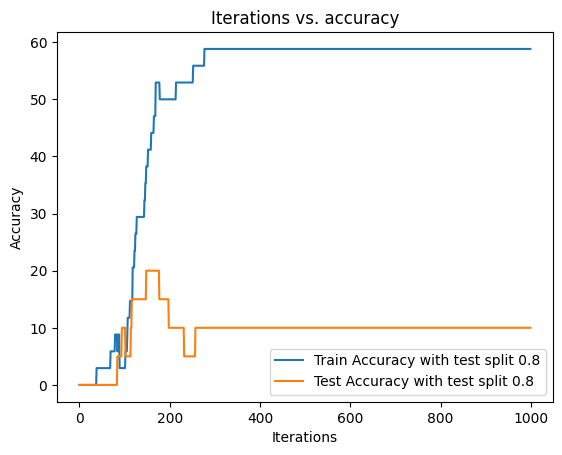

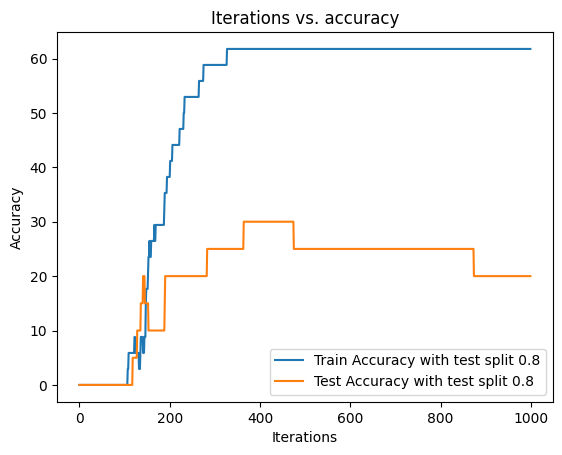

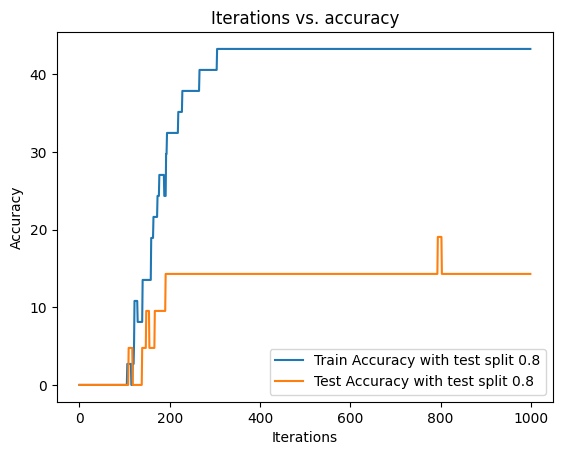

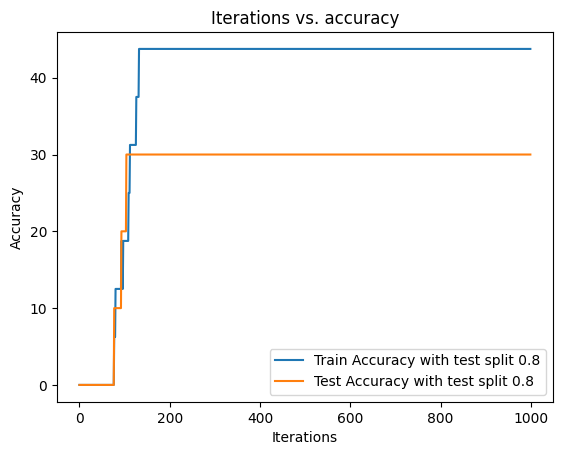

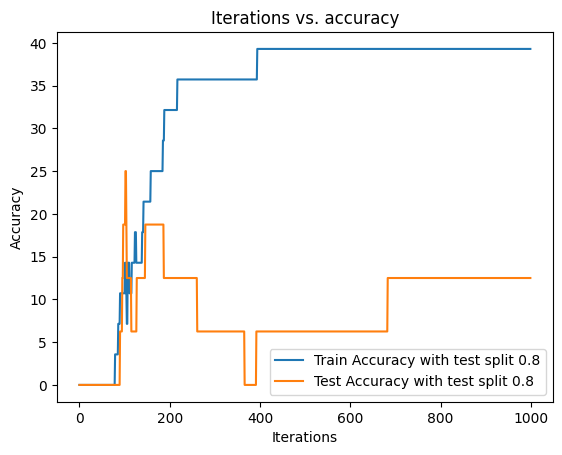

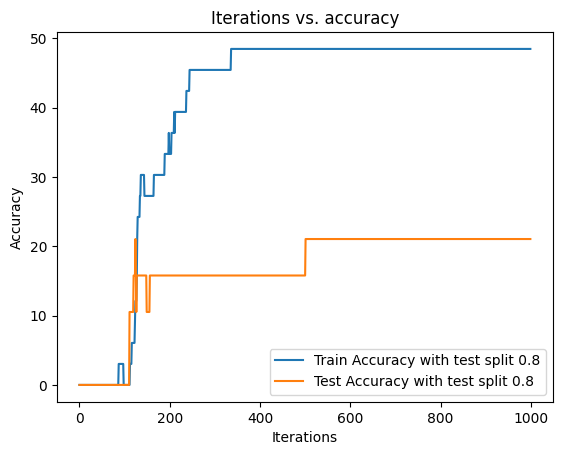

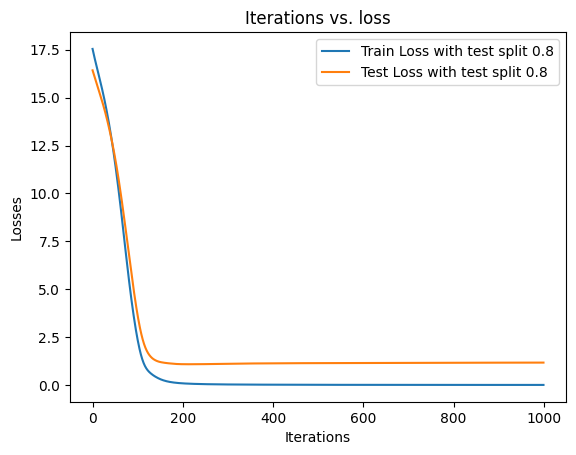

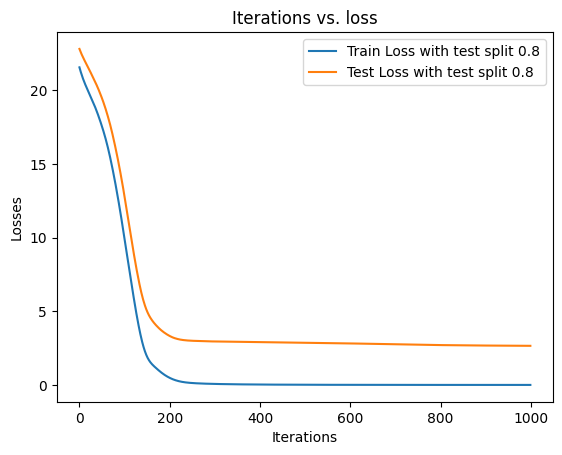

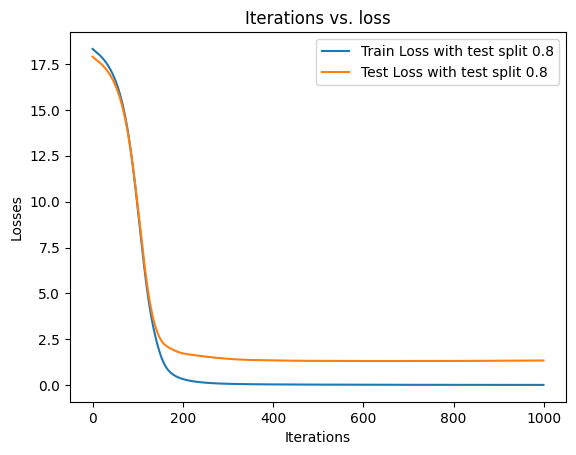

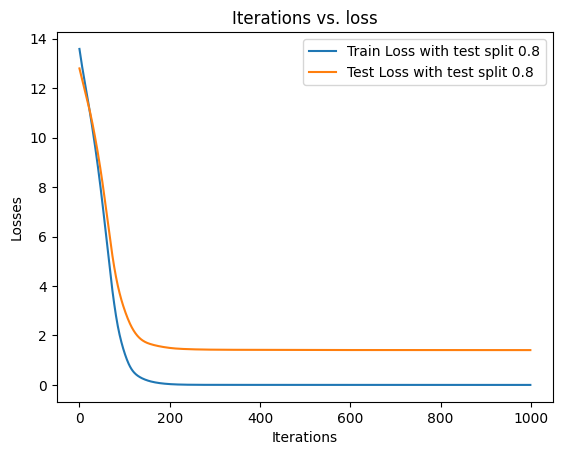

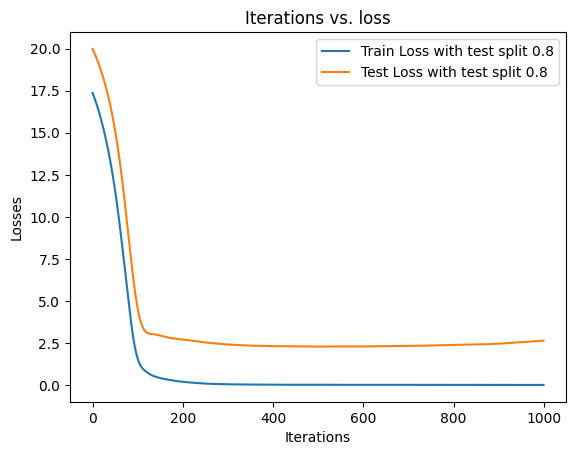

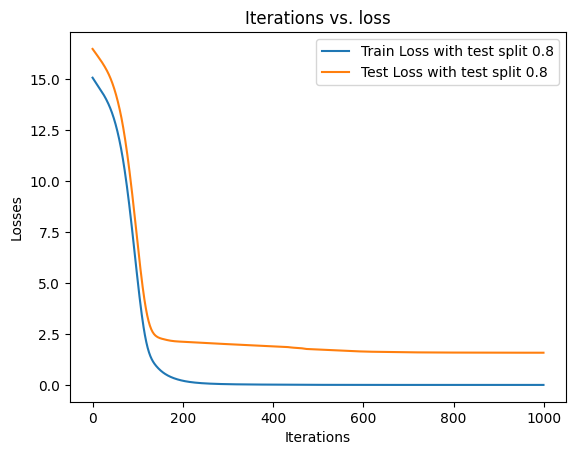

In [ ]:
# # function to show the plot
# plt.show()
num_epochs = 1000
Iterations = range(0, num_epochs)
print(len(Iterations))

for accuracy in accuracies:
  plot_accuracies(accuracy)
  

for loss in losses:
  plot_losses(loss)


1000


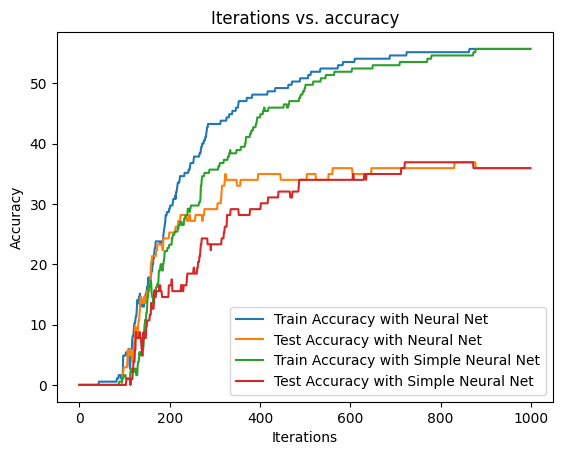

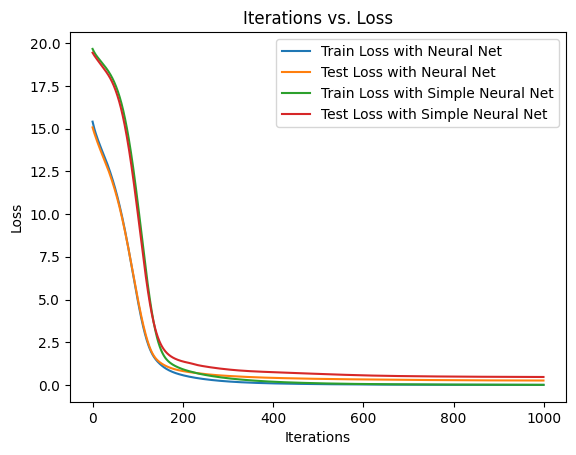

In [ ]:
# # function to show the plot
# plt.show()
num_epochs = 1000
Iterations = range(0, num_epochs)
print(len(Iterations))

legend = []
for model, accuracy in test_model_accuracies.items():
  train_accuracy = accuracy[0.8][0] 
  test_accuracy = accuracy[0.8][1] 

  x_label = 'Iterations'
  y_label = 'Accuracy'
  title = f'Iterations vs. accuracy'
  plot(Iterations, train_accuracy, title, y_label, x_label)
  plot(Iterations, test_accuracy, title, y_label, x_label)
  legend.append(f'Train Accuracy with {model}')
  legend.append(f'Test Accuracy with {model}')

plt.legend(legend)

# function to show the plot
plt.show()

legend = []
for model, losses in test_model_losses.items():
  train_loss = losses[0.8][0] 
  test_loss = losses[0.8][1] 

  x_label = 'Iterations'
  y_label = 'Loss'
  title = f'Iterations vs. Loss'
  plot(Iterations, train_loss, title, y_label, x_label)
  plot(Iterations, test_loss, title, y_label, x_label)
  legend.append(f'Train Loss with {model}')
  legend.append(f'Test Loss with {model}')

plt.legend(legend)

# function to show the plot
plt.show()


In [ ]:
# train six models 
# toronto model mean prediction on vaughan data vs vaughan model mean prediction
# is the coefficient to for a restaurant that goes from toront o 



Model0 can take features and predict a score, assuming the restaurant is in Toronto. So its prediction on restaurants in Vaughan will be the Toronto equivalent. We will find the Model0 prediction on the Vaughan df and compare it to the actual star value to get a coefficient for each sample. 

The mean of all the coefficients will represent moving a restaurant from Toronto to Vaughan.  

In [2]:
import json
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import utils


In [3]:
df = pd.read_csv("cleanedData_cuisinevec.csv", sep=',')
# df = df.rename(index={0: "stars", 1: "delivery", 2: "takeout", 3: "outdoor seating", 4: "closingTime", 5: "cost", 6: "cuisine", 7: "location"})
df

,stars,delivery,takeout,Outdoor seating,hours,cost,location,cuisine1,cuisine2,cuisine3,...,cuisine41,cuisine42,cuisine43,cuisine44,cuisine45,cuisine46,cuisine47,cuisine48,cuisine49,cuisine50
0,4.0,1,1,1,15.0,2,0,0.461130,1.158050,-1.254000,...,0.373500,0.391910,-1.187350,0.462550,0.173133,0.889410,-0.447190,-0.074539,0.020047,0.872685
1,4.5,1,1,1,22.0,2,0,-0.239570,-1.112700,-0.451410,...,-0.614770,0.651480,0.374190,-0.389130,1.165600,-0.143990,-0.947270,0.185640,1.439500,-1.022900
2,4.5,1,1,0,21.0,2,0,-0.560245,0.416880,-0.129945,...,0.014230,0.155507,0.605303,-0.594330,-0.091074,0.521544,-0.575590,0.147694,-0.081906,0.242015
3,4.5,0,0,0,16.0,2,0,-0.085708,-0.044853,-0.929813,...,0.207813,0.555055,-0.048445,-0.052447,0.703163,0.650447,-0.613009,0.111827,0.255091,-0.653027
4,4.0,0,0,1,14.5,2,0,0.360702,0.393248,-1.283488,...,0.288502,0.437224,-0.188186,0.331956,0.499129,0.451081,-0.378374,-0.354534,0.220454,0.140336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,3.5,1,1,1,22.0,2,2,0.156797,-0.716633,-0.494297,...,0.126953,0.564053,0.054940,0.352709,0.847907,0.835447,-0.113245,-0.099306,0.126680,0.651583
1026,4.0,0,0,0,21.5,2,2,-0.502720,-0.862780,-0.627790,...,-0.906370,0.861670,0.009006,-0.089209,0.154290,0.450530,-0.464430,0.270310,0.100940,-1.380900
1027,3.0,0,0,0,23.0,2,2,-0.517420,0.405430,-0.351090,...,-0.766800,-0.285950,1.320800,-0.169750,1.765100,-0.466960,-0.716560,0.291030,0.495080,-1.130600
1028,4.0,0,0,0,16.0,1,2,0.442194,-0.481770,-0.675675,...,-0.020160,0.184355,0.689670,-0.249810,1.255900,0.003750,-0.508270,0.085282,0.212090,-0.145425


In [4]:
# Perform train-test split
Y_col = 'stars'
X_cols = df.loc[:, df.columns != Y_col].columns
X_train, X_test, y_train, y_test = train_test_split(
    df[X_cols].values, df[Y_col].values,test_size=0.1, random_state=42)
# y_train = list(y_train)
# y_test = list(y_test)
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)
# print(y_train)

In [5]:
dtc =  DecisionTreeClassifier()
rfc = RandomForestClassifier()
knn =  KNeighborsClassifier()
gbc = GradientBoostingClassifier()
xgb = XGBClassifier()

In [6]:
clf = [dtc,rfc,knn,xgb]
for algo in clf:
    y = to_categorical(y_train)
    X = X_train
    score = cross_val_score( algo,X,y,cv = 5,scoring = 'accuracy')
    print("The accuracy score of {} is:".format(algo),score.mean())

The accuracy score of DecisionTreeClassifier() is: 0.5264399883754722
The accuracy score of RandomForestClassifier() is: 0.599814007555943
The accuracy score of KNeighborsClassifier() is: 0.592205754141238
The accuracy score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) is: 0.56417320546352

In [69]:
clf = [('dtc',dtc),('rfc',rfc),('knn',knn),('xgb',xgb)] #list of (str, estimator)

#convert y values to categorical values
y = to_categorical(y_train,num_classes=10)
X = X_train
print(y[0])
stackY = []
filled = False
for (name, model) in clf:
  y = to_categorical(y_train,num_classes=10)
  X = X_train
  model.fit(X, y)
  y_pred = model.predict(X_test)
  if filled == False:
    stackY = y_pred
    filled = True
  else:
    stackY = np.concatenate((stackY, y_pred), axis=1) 


[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [94]:
m = nn.Linear(40, 10)
print(stackY)
final_y_pred = m(torch.from_numpy(stackY).to(torch.float32))

from numpy import argmax

y_pred = .5*argmax(final_y_pred.detach().numpy(), axis=1)

total = 0
correct = 0
total += len(y_test)
correct += np.sum((y_pred) == y_test)
accuracy = 100 * correct/total
print(accuracy)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
13.592233009708737
